In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('BHP.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape



(13320, 9)

In [4]:
### Gives datatypes of features 
df.dtypes



area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [5]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [6]:
### Gives all information about dataset
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [7]:
df.duplicated().sum()

529

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(12791, 9)

In [10]:
df.isnull().sum()/len(df)*100

area_type        0.000000
availability     0.000000
location         0.007818
size             0.125088
society         41.654288
total_sqft       0.000000
bath             0.570714
balcony          4.729888
price            0.000000
dtype: float64

In [11]:
df.drop('society', axis=1, inplace=True)

In [12]:


df.dropna(inplace=True)



In [13]:


print(df.shape)
print('-----------------')
df.isnull().sum()



(12185, 8)
-----------------


area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [14]:


df['area_type'].value_counts(normalize=True)*100



Super built-up  Area    65.752975
Built-up  Area          18.793599
Plot  Area              14.780468
Carpet  Area             0.672959
Name: area_type, dtype: float64

In [15]:
df['availability'].value_counts(normalize=True)*100


Ready To Move    79.368076
18-May            2.289700
18-Dec            2.199426
18-Apr            2.125564
18-Aug            1.534674
                   ...    
16-Nov            0.008207
14-Nov            0.008207
16-Jan            0.008207
17-Feb            0.008207
14-Jul            0.008207
Name: availability, Length: 78, dtype: float64

In [16]:


df['location'].value_counts(normalize=True)*100



Whitefield            4.078785
Sarjapur  Road        2.888798
Electronic City       2.338941
Kanakpura Road        1.953221
Thanisandra           1.854739
                        ...   
Milk Colony           0.008207
Jaladarsini Layout    0.008207
Sundara Nagar         0.008207
Madanayakahalli       0.008207
Abshot Layout         0.008207
Name: location, Length: 1265, dtype: float64

In [17]:


df['size'].value_counts(normalize=True)*100



2 BHK         40.082068
3 BHK         32.334838
4 Bedroom      6.130488
3 Bedroom      4.226508
1 BHK          4.210094
4 BHK          3.890029
2 Bedroom      2.568732
5 Bedroom      2.109151
6 Bedroom      1.386951
1 Bedroom      0.853508
7 Bedroom      0.558063
8 Bedroom      0.533443
5 BHK          0.295445
9 Bedroom      0.237998
6 BHK          0.188757
7 BHK          0.131309
1 RK           0.106689
9 BHK          0.041034
8 BHK          0.024620
10 Bedroom     0.024620
11 Bedroom     0.016414
11 BHK         0.008207
27 BHK         0.008207
43 Bedroom     0.008207
14 BHK         0.008207
12 Bedroom     0.008207
13 BHK         0.008207
Name: size, dtype: float64

In [18]:
df['bath'].value_counts(normalize=True)*100

2.0     53.114485
3.0     24.965121
4.0      8.863357
1.0      6.237177
5.0      3.504309
6.0      1.986048
7.0      0.672959
8.0      0.344686
9.0      0.213377
10.0     0.049241
27.0     0.008207
11.0     0.008207
12.0     0.008207
40.0     0.008207
15.0     0.008207
13.0     0.008207
Name: bath, dtype: float64

In [19]:


df['balcony'].value_counts(normalize=True)*100



2.0    39.762002
1.0    38.572015
3.0    13.377103
0.0     8.288880
Name: balcony, dtype: float64

In [20]:
df.describe()

,bath,balcony,price
count,12185.000000,12185.000000,12185.000000
mean,2.631022,1.582273,107.631297
std,1.240363,0.822561,134.022372
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,70.000000
75%,3.000000,2.000000,115.000000
max,40.000000,3.000000,2912.000000


In [21]:


df['size'].str.get(0)



0        2
1        4
2        3
3        3
4        2
        ..
13312    2
13314    3
13315    5
13317    2
13318    4
Name: size, Length: 12185, dtype: object

In [22]:
df['BHK'] = df['size'].apply(lambda x: int(x.split(' ')[0]))

In [23]:
df.drop('size', axis=1, inplace=True)


In [24]:


df.head()



,area_type,availability,location,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,19-Dec,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,1440,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,1200,2.0,1.0,51.00,2


In [25]:


df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 12185 entries, 0 to 13318
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12185 non-null  object 
 1   availability  12185 non-null  object 
 2   location      12185 non-null  object 
 3   total_sqft    12185 non-null  object 
 4   bath          12185 non-null  float64
 5   balcony       12185 non-null  float64
 6   price         12185 non-null  float64
 7   BHK           12185 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 856.8+ KB


In [26]:
df[df['BHK']>20]

,area_type,availability,location,total_sqft,bath,balcony,price,BHK
1718,Super built-up Area,Ready To Move,2Electronic City Phase II,8000,27.0,0.0,230.0,27
4684,Plot Area,Ready To Move,Munnekollal,2400,40.0,0.0,660.0,43


In [27]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [28]:
def convert_range_to_single(x):
    temp = x.split('-')
    
    if len(temp) == 2:
        return (float(temp[0]) + float(temp[1]))/2
    try:
        return float(x)
    except:
        return None

convert_range_to_single('1133 - 1384')


1258.5

In [29]:
df['total_sqft'] = df['total_sqft'].apply(convert_range_to_single)

In [30]:


df.head()



,area_type,availability,location,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,19-Dec,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,1200.0,2.0,1.0,51.00,2


In [31]:


df['location'].value_counts()



Whitefield            497
Sarjapur  Road        352
Electronic City       285
Kanakpura Road        238
Thanisandra           226
                     ... 
Milk Colony             1
Jaladarsini Layout      1
Sundara Nagar           1
Madanayakahalli         1
Abshot Layout           1
Name: location, Length: 1265, dtype: int64

In [32]:
df['location'] = df['location'].apply(lambda x: x.strip())
df['location'].value_counts()

Whitefield                 498
Sarjapur  Road             352
Electronic City            287
Kanakpura Road             238
Thanisandra                229
                          ... 
Jayamahal Extension          1
Hallehalli                   1
Nagarbhavi  BDA Complex      1
Rajanna Layout               1
Abshot Layout                1
Name: location, Length: 1254, dtype: int64

In [33]:

locations = df['location'].value_counts()
locations_Less_than_10 = locations[locations<= 10]
locations_Less_than_10

Dairy Circle               10
Vasanthapura               10
Ganga Nagar                10
HAL 2nd Stage              10
Naganathapura              10
                           ..
Jayamahal Extension         1
Hallehalli                  1
Nagarbhavi  BDA Complex     1
Rajanna Layout              1
Abshot Layout               1
Name: location, Length: 1027, dtype: int64

In [34]:

df['location'] = df['location'].apply(lambda x: 'Other' if x in locations_Less_than_10 else x)

In [35]:
df['location'].value_counts()

Other                   2806
Whitefield               498
Sarjapur  Road           352
Electronic City          287
Kanakpura Road           238
                        ... 
Prithvi Layout            11
Vishveshwarya Layout      11
Karuna Nagar              11
LB Shastri Nagar          11
Nagasandra                11
Name: location, Length: 228, dtype: int64

In [36]:
df.head()

,area_type,availability,location,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,19-Dec,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,1200.0,2.0,1.0,51.00,2


In [37]:
df['availability_to_move'] = df['availability'].apply(lambda x: 'Yes' if x == 'Ready To Move' else 'No')

In [38]:


df['bath'] = df['bath'].astype(int)
df['balcony'] = df['balcony'].astype(int)



In [39]:


df['balcony'].value_counts(normalize=True)



2    0.397620
1    0.385720
3    0.133771
0    0.082889
Name: balcony, dtype: float64

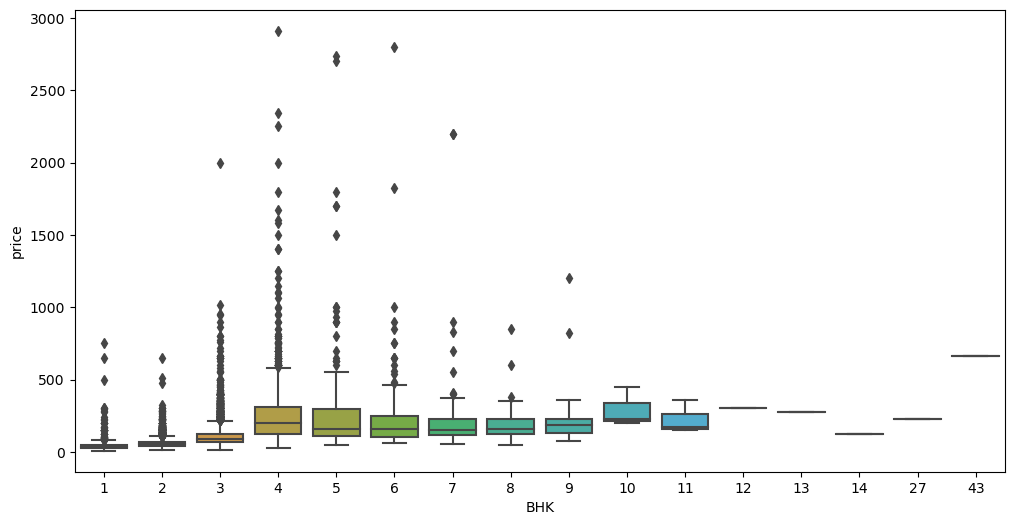

In [40]:


plt.figure(figsize=(12,6))
sns.boxplot(x= 'BHK', y='price', data= df);



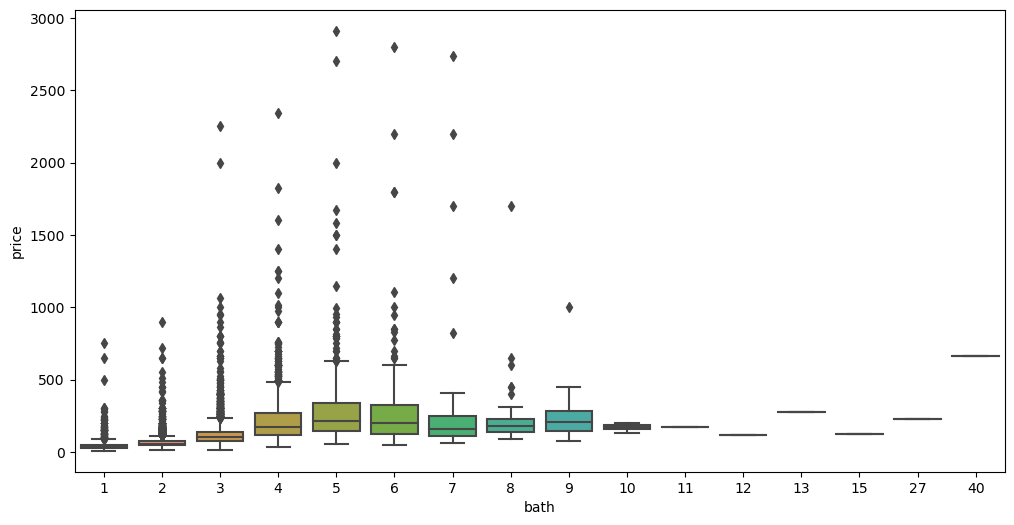

In [41]:


plt.figure(figsize=(12,6))
sns.boxplot(x= 'bath', y='price', data= df);



In [42]:
df.describe()

,total_sqft,bath,balcony,price,BHK
count,12143.000000,12185.000000,12185.000000,12185.000000,12185.000000
mean,1520.562387,2.631022,1.582273,107.631297,2.749282
std,1183.122889,1.240363,0.822561,134.022372,1.220753
min,5.000000,1.000000,0.000000,8.000000,1.000000
25%,1100.000000,2.000000,1.000000,50.000000,2.000000
50%,1265.000000,2.000000,2.000000,70.000000,3.000000
75%,1650.000000,3.000000,2.000000,115.000000,3.000000
max,52272.000000,40.000000,3.000000,2912.000000,43.000000


In [43]:

(df['total_sqft']/df['BHK']).describe()

count    12143.000000
mean       571.209914
std        387.778724
min          0.714286
25%        473.333333
50%        550.000000
75%        623.333333
max      26136.000000
dtype: float64

In [44]:


df = df[((df['total_sqft']/df['BHK'])>=300)]
df.describe()



,total_sqft,bath,balcony,price,BHK
count,11498.000000,11498.000000,11498.000000,11498.000000,11498.000000
mean,1552.483046,2.522613,1.586189,106.684092,2.615846
std,1203.150404,1.017145,0.814386,136.662807,0.933568
min,300.000000,1.000000,0.000000,9.000000,1.000000
25%,1105.000000,2.000000,1.000000,49.000000,2.000000
50%,1294.500000,2.000000,2.000000,69.140000,2.000000
75%,1680.000000,3.000000,2.000000,112.000000,3.000000
max,52272.000000,13.000000,3.000000,2912.000000,13.000000


In [45]:


df.shape



(11498, 9)

In [46]:
df['price_per_sqft'] = (df['price']/df['total_sqft'])*100000

In [47]:


df.head()



,area_type,availability,location,total_sqft,bath,balcony,price,BHK,availability_to_move,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,1056.0,2,1,39.07,2,No,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,2600.0,5,3,120.00,4,Yes,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,1440.0,2,3,62.00,3,Yes,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521.0,3,1,95.00,3,Yes,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,1200.0,2,1,51.00,2,Yes,4250.000000


In [48]:
df['price_per_sqft'].describe()

count     11498.000000
mean       6263.708278
std        4048.606167
min         267.829813
25%        4226.921275
50%        5290.820191
75%        6875.000000
max      176470.588235
Name: price_per_sqft, dtype: float64

Skewness: 9.747404630800572
--------------------------------------------------


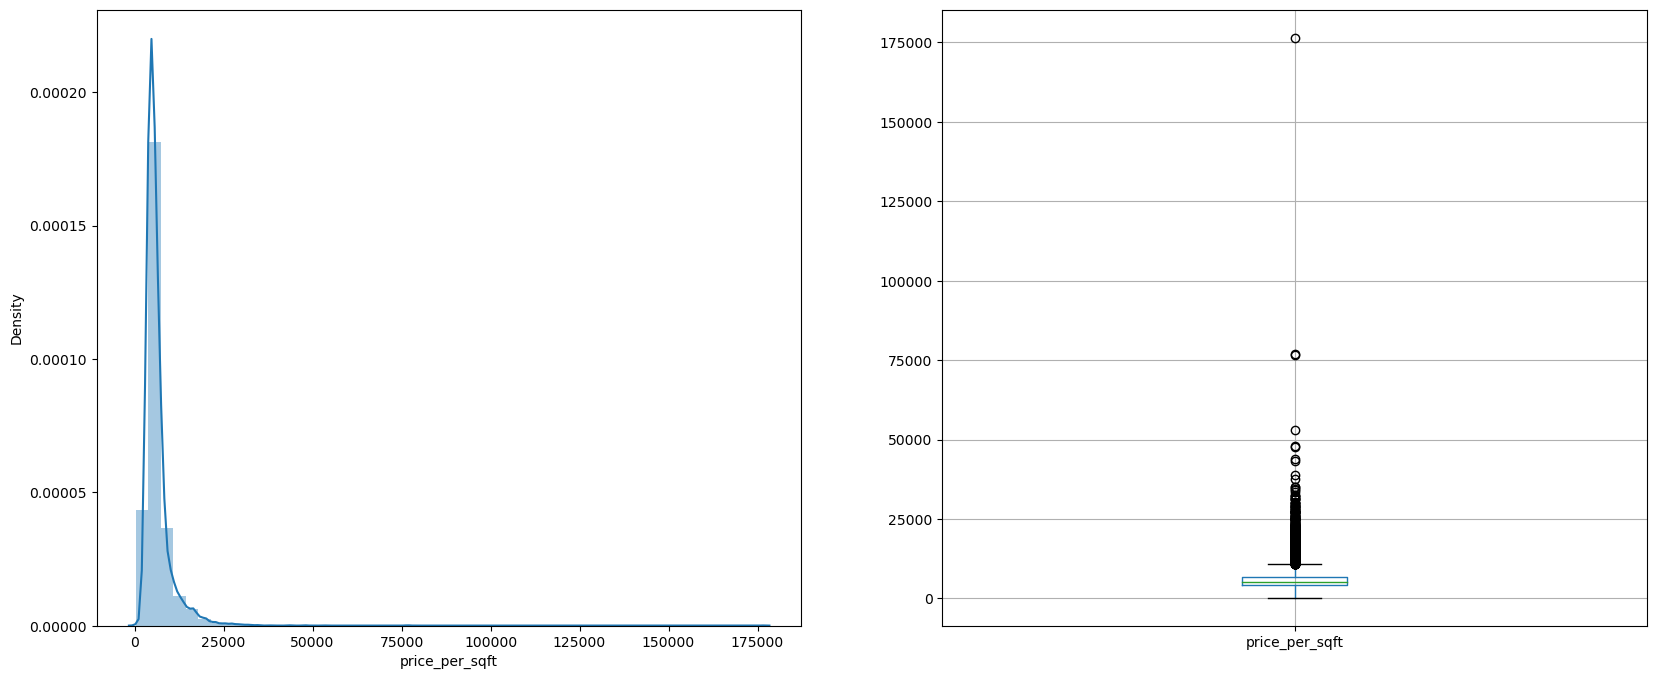

In [49]:


print('Skewness:', df['price_per_sqft'].skew())
print('-'*50)
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.distplot(df['price_per_sqft'], kde=True)

plt.subplot(1,2,2)
figure = df.boxplot(column = 'price_per_sqft');



In [50]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df_new = remove_pps_outliers(df)
df_new.shape

(9433, 10)

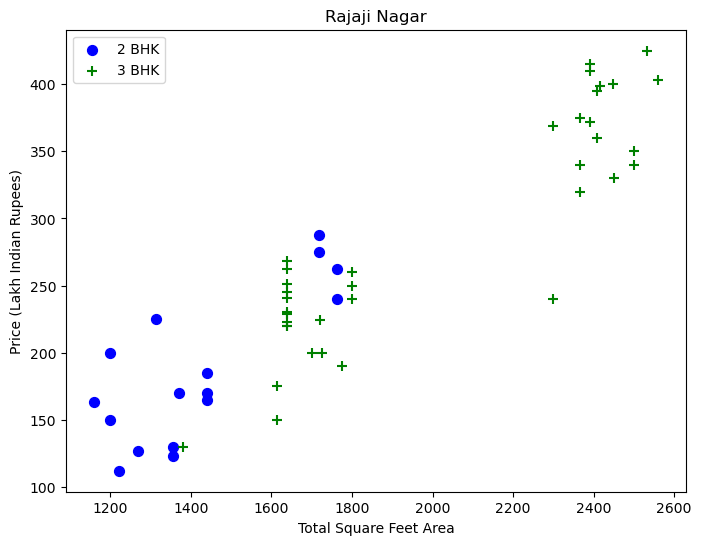

In [51]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    plt.figure(figsize=(8,6))
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df_new,"Rajaji Nagar")

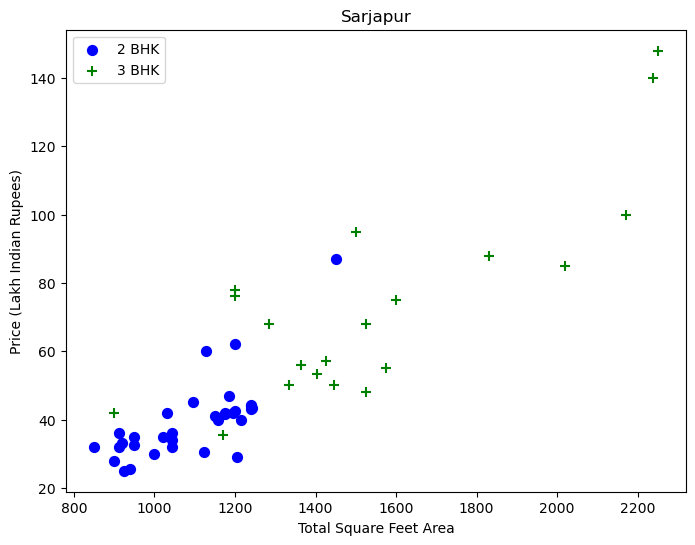

In [52]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    plt.figure(figsize=(8,6))
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df_new,"Sarjapur")


In [53]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df_new = remove_bhk_outliers(df_new)
df_new.shape


(6688, 10)

In [54]:


df_new[df_new.bath>8]



,area_type,availability,location,total_sqft,bath,balcony,price,BHK,availability_to_move,price_per_sqft
3364,Built-up Area,18-Feb,KR Puram,4600.0,9,2,200.0,9,No,4347.826087
4600,Super built-up Area,Ready To Move,Mico Layout,5000.0,9,3,210.0,9,Yes,4200.000000
4918,Super built-up Area,Ready To Move,Other,5000.0,9,3,360.0,11,Yes,7200.000000
5298,Super built-up Area,Ready To Move,Other,11338.0,9,1,1000.0,6,Yes,8819.897689
6512,Super built-up Area,Ready To Move,Other,5425.0,13,0,275.0,13,Yes,5069.124424
7323,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,3600.0,9,3,240.0,9,Yes,6666.666667


In [55]:


df_new[df_new.bath > df_new.BHK+2]



,area_type,availability,location,total_sqft,bath,balcony,price,BHK,availability_to_move,price_per_sqft
1433,Built-up Area,Ready To Move,Chikkabanavar,2460.0,7,2,80.0,4,Yes,3252.032520
5298,Super built-up Area,Ready To Move,Other,11338.0,9,1,1000.0,6,Yes,8819.897689
8311,Super built-up Area,Ready To Move,Thanisandra,1806.0,6,2,116.0,3,Yes,6423.034330


In [56]:


df_new = df_new[df_new.bath < df_new.BHK+2]
df_new.shape



(6620, 10)

In [57]:
df_new.drop(['availability','availability_to_move', 'price_per_sqft','area_type', 'balcony'], axis=1, inplace=True)

In [58]:
df_new.shape

(6620, 5)

In [59]:
df_new.head()

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4,428.0,4
1,1st Block Jayanagar,1630.0,3,194.0,3
2,1st Block Jayanagar,1875.0,2,235.0,3
3,1st Block Jayanagar,1200.0,2,130.0,3
4,1st Block Jayanagar,1235.0,2,148.0,2


In [60]:


X = df_new.drop('price', axis=1)
y = df_new['price']



In [61]:
X = pd.get_dummies(X, drop_first=True)

In [62]:
print(X.shape, y.shape)

(6620, 230) (6620,)


In [63]:


X



,total_sqft,bath,BHK,location_1st Phase JP Nagar,location_2nd Stage Nagarbhavi,location_5th Phase JP Nagar,location_6th Phase JP Nagar,location_7th Phase JP Nagar,location_8th Phase JP Nagar,location_9th Phase JP Nagar,...,location_Vijayanagar,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur
0,2850.0,4,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9422,672.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9425,1692.0,3,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9427,2500.0,5,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9431,1855.0,3,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
